# Kriptovalute

Kriptovalute su digitalne imovine prvotno osmišljene kao sredstvo za razmjenu vrijednosti koje koriste kriptografiju za validaciju i sigurnost transakcija, te kontrolu stvaranja dodatnih jedinica.
Kriptovalute koriste decentraliziranu kontrolu za razliku od centraliziranih bankarskih sustava.

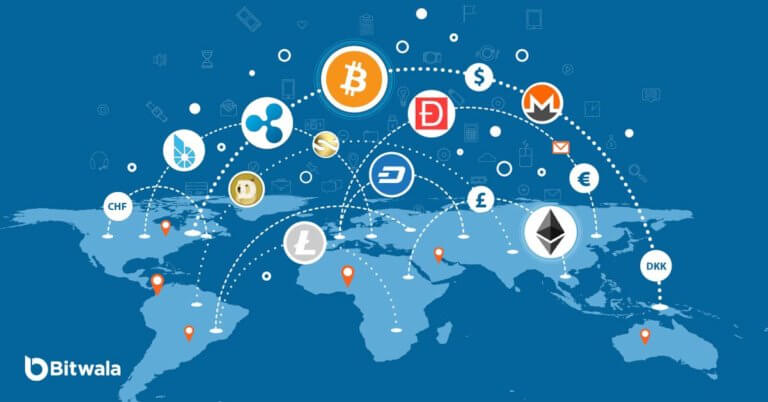

In [1]:
from IPython.display import Image 
Image(filename='Cryptocurrency.jpeg')

## Bitcoin

Bitcoin je prva decentralizirana kriptovaluta napravljena 2009. godine od čovjeka(ili ljudi) pod pseudonimom Satoshi Nakamoto. Motiv za projektiranje Bitcoina je bilo veliko nezadovoljstvo centraliziranim sustavom kojim su upravljale države i banke. 
Za Satoshija Nakamota problem bankarskog sustava je bilo povjerenje trećoj strani, tj. samoj banci preko kojih se svaka transakcija odvijala. Ono što je po njemu(njima) bilo potrebno je elektronički platni sustav baziran na kriptografijskom dokazu a ne na povjerenju trećoj strani, koji bi omogućavao dvjema stranama da razmjene sredstva direktno jedan s drugim bez povjeravanja trećoj strani. Problem je rješen takozvanom javnom knjigom u kojoj su zapisane sve transakcije javno, a sami računi i količina novca na njima je postala anonimna. Javnu knjigu sadrži svaki čvor koji sudjeluje u mreži. Javna knjiga je zapravo niz blokova u kojima su zapisane transakcije koje su obavljane na mreži.

Od tada do danas napravljeno je mnoštvo kriptovaluta koje se baziraju na raznim područjima primjene(od financija, preko osiguranja do nutricionizma).


## Blochchain

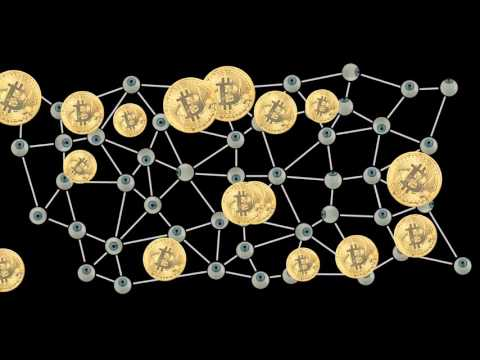

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo("r43LhSUUGTQ")

Gotovo sve kriptovalute su napravljene na blockchain tehnologiji. Blockchain možemo poistovjetiti sa bazom podataka koja je podjeljena između svih čvorova koji sudjeluju u sustavu.
Osnovna građevna jedinica svakog blockchaina je blok.
Svaki blok sastoji se od svog zaglavlja i tijela. Zaglavlje sadrži hash prethodnog bloka i hash trenutnog bloka, dok tijelo sadrži podatake koji su spremljeni u bloku(data).

In [3]:
import hashlib

class Block:

    def __init__(self, previousHash, data):
        
        self.data = data
        self.previousHash = previousHash
        self.encoded = ""
        self.hash = self.hashBlock().hexdigest()
        
        
    def hashBlock(self):
        
        sha = hashlib.sha256()
        se = (str(self.data) + str(self.previousHash)).encode('utf-8')
        sha.update(se)
        return sha

U naš primitivni blok možemo zapisati bilo kakav podatak od teksta do slika i videa.

In [4]:
firstBlock = Block("","Ovdje moze biti bilo koji podatak")#Tekst spremljen u prvom bloku
firstBlock.hash
secondBlock = Block(firstBlock.hash,Image(filename='Cryptocurrency.jpeg'))
secondBlock.hash
firstBlock.hash

'6e3f7192eb7e4267e58ebebedaa950654c45ac025e14dc596d5aa35d6d9b7929'

### Hash

Hash funkcija je algoritam koji od podatka proizvoljne veličine(može biti slovo, a može biti i tekst cijele Biblije ili film od 2 sata) stvara podatak fiksne dužine. Hashiranje je deterministički određena funkcija gdje isti ulaz podataka uvijek daje istu izlaznu vrijednost. Najmanja izmjena podatka kojeg hashiramo rezultira totalno drugim outputom.
Linija iznad ispisuje jedinstveni 256-bitni output SHA-256 algoritma. Ako malo promjenimo ulazni string vijednost hash funkcije će biti totalno drugačija:

In [5]:
#Podaci su indentični samo je promjenjen prvi parametar umjesto zadnjeg znaka u hashu("9") stavljen je znak "8" 
secondBlockChanged = Block(firstBlock.hash[:-1]+"8",Image(filename='Cryptocurrency.jpeg'))
secondBlockChanged.hash

'8b6de1d6bab83c8eca4a1ab66fd04c74e72b9e06280726a4fd956da8e57b777f'

Što je toliko zanimljivo kod hash funkcije?

Odgovor leži u invertibilnosti hash funkcije. Što znači da je gotovo nemoguće rekonstruirati ulaznu vrijednost gledajući samo izlaznu vrijednost.
Također pomoću hash funkcije svaki blok ima svoju jedinstvenu "šifru" koja ovisi o šifri prethodnog bloka i podacima koji se nalaze u samom bloku.

Najjednostavnija moguća implementacija blockchaina je sljedeća:

In [6]:
class Blockchain:
    
    def __init__(self, genesisBlock):
        
        self.blocks = []
        self.blocks.append(genesisBlock)
    
    def addNewBlock(self, block):
        
        self.blocks.append(block)

In [7]:
blockchain = Blockchain(firstBlock)
blockchain.addNewBlock(secondBlock)
thirdBlock = Block(secondBlock.hash,"Dostojevski je bio sin liječnika, pripadnika nižeg plemstva kojeg su ubili vlastiti kmetovi zbog okrutnosti i ponižavanja, dok mu je majka umrla u djetinjstvu. Budući pisac pohađa i završava vojno-inženjerijsko obrazovanje u Petrogradu, no rano odlučuje da će se posvetiti književničkom pozivu. Među ranim utjecajima najvažniji je njemački dramatičar i pjesnik Friedrich Schiller, za Dostojevskog utjelovljenje idealizma i humanosti - upliv koji je kasnije žestoko ismijavao i karikirao, no, kojeg se nije oslobodio do kraja života. Prevodi Balzacovu Eugeniju Grandet i pod utjecajem Gogolja piše svoje prvo djelo, kratki epistolarni roman Bijedni ljudi (1846.), koji je prikazom trpnji i zanosa tzv. malih ljudi oduševio najznačajnijeg ruskog kritičara Visariona Bjelinskog i lansirala Dostojevskog u sferu eminentnih ruskih književnih krugova. Autor se kreće u društvu literata i dobrostojećih mecena i plemstva, ali izgleda da su njegova sramežljivost, počeci manifestacije živčanih poremećaja koji su kasnije dijagnosticirani kao epilepsija, kao i sklonost kršćanskom misticizmu doprinijeli da nije bio u potpunosti prihvaćen u liberalno-sekularnim krugovima. ")
blockchain.addNewBlock(thirdBlock)
print(blockchain.blocks[0].hash)
print(blockchain.blocks[1].hash)
print(blockchain.blocks[2].hash)

6e3f7192eb7e4267e58ebebedaa950654c45ac025e14dc596d5aa35d6d9b7929
4c6e24b8ca1c6291594b66ca7635a2c96c964903c43eb28633edd74f297e40e4
2bc19177d9af20b7df48e629d6ff54937de2c58041ae4631e302a98173021d90


U liniji iznad imamo blockchain koji se sastoji od tri bloka koji su povezani tako da treći blok sadrži u svom zaglavlju hash drugoga a drugi u zaglavlju hash prvoga. Tako svaki blok može vidjeti što se nalazi u svim prethodnima ali on ne zna zablokove iza sebe. Ako promjenimo bilo što u podacima bilo kojega bloka njegov, a i svi hashovi blokova koji slijede bit će promjenjeni. Kreirat ćemo blockchain identičan prethodnom prvi i treći blok ostaju ne promjenjeni dok su u drugom bloku promjenjeni podaci.

In [8]:
blockchain1 = Blockchain(firstBlock)
secondBlockChangedTwice = Block(firstBlock.hash,"Promjenio sam drugi blok")
blockchain1.addNewBlock(secondBlockChangedTwice)
thirdBlock = Block(secondBlockChangedTwice.hash,"Dostojevski je bio sin liječnika, pripadnika nižeg plemstva kojeg su ubili vlastiti kmetovi zbog okrutnosti i ponižavanja, dok mu je majka umrla u djetinjstvu. Budući pisac pohađa i završava vojno-inženjerijsko obrazovanje u Petrogradu, no rano odlučuje da će se posvetiti književničkom pozivu. Među ranim utjecajima najvažniji je njemački dramatičar i pjesnik Friedrich Schiller, za Dostojevskog utjelovljenje idealizma i humanosti - upliv koji je kasnije žestoko ismijavao i karikirao, no, kojeg se nije oslobodio do kraja života. Prevodi Balzacovu Eugeniju Grandet i pod utjecajem Gogolja piše svoje prvo djelo, kratki epistolarni roman Bijedni ljudi (1846.), koji je prikazom trpnji i zanosa tzv. malih ljudi oduševio najznačajnijeg ruskog kritičara Visariona Bjelinskog i lansirala Dostojevskog u sferu eminentnih ruskih književnih krugova. Autor se kreće u društvu literata i dobrostojećih mecena i plemstva, ali izgleda da su njegova sramežljivost, počeci manifestacije živčanih poremećaja koji su kasnije dijagnosticirani kao epilepsija, kao i sklonost kršćanskom misticizmu doprinijeli da nije bio u potpunosti prihvaćen u liberalno-sekularnim krugovima. ")
blockchain1.addNewBlock(thirdBlock)
print(blockchain1.blocks[0].hash)
print(blockchain1.blocks[1].hash)
print(blockchain1.blocks[2].hash)

6e3f7192eb7e4267e58ebebedaa950654c45ac025e14dc596d5aa35d6d9b7929
b5a305ad60882dfa76b1a16b8bee56e6912b201f8b95776210547812db0dce79
e58da200b19e4e7f45a1f900c9989ca20fe473f1fb56b8f7dbb4c57a300ab5e7


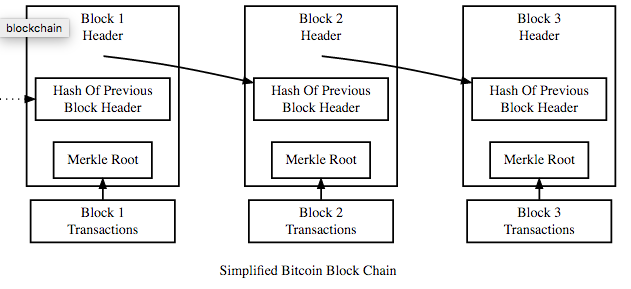

In [9]:
Image(filename='blockchain.png')

Da bi implementirali primitivnu kriptovalutu morat ćemo dodati još puno toga u svaki blok. Krenimo sa transakcijama. U svaki blok ćemo upisivati transakcije koje će biti javno dostupne svim čvorovima, tj. svatko tko sudjeluje u održavanju mreže vidi tko je kome poslao koju količinu coina.
Za početak implementirat ćemo transakciju:

In [10]:
class Transaction:
    
    def __init__(self, sender, reciever, amount,fee):
        
        self.sender = sender
        self.reciever = reciever
        self.amount = amount
        self.fee = fee
        self.encoded = (str(self.sender) + str(self.reciever) + 
                str(self.amount) ).encode('utf-8')
        self.hash = self.hashTransaction().hexdigest()
        
        
    def hashTransaction(self):
        
        sha = hashlib.sha256()
        sha.update(self.encoded)
        return sha
    
    def returnTransaction(self):
        
        return (str(self.sender)+" "+ str(self.reciever)+" "
              +str(self.amount)+" "+str(self.fee))

Čvorovi koji sudjeluju u održavanju mreže zovu se rudari(miners). Kada korisnik mreže odluči poslati određenu količinu coina nekom drugom korisniku on ponudi određenu naknadu rudaru koji uvrsti njegovu transakciju u svoj blok. Normalno što je veća naknada ponuđena to je veća vjerojatnost da će njegova transakcija biti prihvaćena prije. Sve transakcije koje su predložene ali nisu prihvaćene(zapisane u blockchain) idu u bazen nepotvrđenih transakcija(mempool):

In [11]:
import random
class Mempool:
    
    def __init__(self):
        
        self.transactions=[]
        
    def addNewTransaction(self,transaction):
        
        self.transactions.append(transaction)
        self.transactions = sorted(self.transactions, key=lambda trans: trans.fee)
    
    def getSizeOfMempool(self):
        return len(self.transactions)
    
    def printMempool(self):
        
        for trans in self.transactions:
            print(trans.returnTransaction())
    
    def generateRandom(self,n,accounts):
        
        for i in range(n):
   
            sender = random.choice(accounts)
            reciever = random.choice(accounts)
            while (sender == reciever):
                reciever = random.choice(accounts)
    
            amount = random.randint(1,100)
            fee = random.randint(1,100) / 100
            transaction = Transaction(sender,reciever,amount,fee)
            self.addNewTransaction(transaction)


Radi jednostavnosti račune ćemo identificirati imenima, a ne hashevima kako to inače biva radi anonimnosti.

In [12]:
accounts =['Alice','Bob','Mary','Peter','John']
simulationMempool = Mempool()
transactions = []

for i in range(100):
   
    sender = random.choice(accounts)
    reciever = random.choice(accounts)
    while (sender == reciever):
        reciever = random.choice(accounts)
    
    amount = random.randint(1,100)
    fee = random.randint(1,100) / 100
    transaction = Transaction(sender,reciever,amount,fee)
    simulationMempool.addNewTransaction(transaction)
simulationMempool.printMempool()

Peter Alice 5 0.02
Peter Alice 23 0.03
Mary John 76 0.03
Mary John 4 0.04
Peter Alice 47 0.07
Peter Bob 8 0.07
Bob John 69 0.08
Bob John 16 0.09
Mary John 27 0.1
Peter Mary 65 0.1
Mary Peter 89 0.1
Alice Mary 5 0.12
Alice Bob 61 0.13
Peter John 23 0.16
Mary Bob 79 0.17
Bob Alice 41 0.18
Alice Bob 8 0.19
Bob John 91 0.2
Peter Bob 15 0.2
John Bob 53 0.21
Bob Peter 17 0.22
Mary Peter 41 0.23
John Bob 50 0.23
Peter Alice 22 0.26
Mary Bob 47 0.27
Mary Peter 47 0.29
Peter Bob 52 0.29
Bob Peter 12 0.3
Alice John 23 0.31
Alice Mary 60 0.31
John Peter 45 0.34
Alice John 69 0.35
Mary Peter 60 0.35
Mary Alice 76 0.37
Alice Mary 39 0.39
John Peter 85 0.4
Bob Alice 42 0.41
Peter Mary 79 0.42
Alice Peter 39 0.43
Bob Peter 98 0.44
Peter Mary 61 0.44
Peter Mary 84 0.44
Mary Alice 66 0.44
John Mary 95 0.45
Peter Bob 10 0.45
Bob Mary 72 0.45
Peter Alice 9 0.46
Alice John 72 0.47
Bob Peter 100 0.47
Peter Alice 5 0.52
Peter Mary 4 0.56
Mary Bob 99 0.58
John Peter 49 0.6
Bob Peter 85 0.6
Bob Mary 58 0.6
Bo

Generirali smo mempool sa slučajnim transakcijama, što će nam poslužiti za simulaciju. U praksi mempool je dimičan, tj. svakog trena bilo koji čvor može ubaciti transakciju neovisno o tome jeli ju teoretski moguće izvršiti(tj. ima li korisnik coina koliko šalje).

### Privatni i javni ključevi

Da bi se korisnik uključio u mrežu, za to mu je potrebna šifra. Da bi svakome korisniku pridružili jedinstvenu šifru koristi se kriptografija s javnim ključem, tj. šifriranje i dešifriranje koriste različite ključeve. Javni ključ će biti javno dostupan svim korisnicima, dok je privatni ključ jedinstveni indetifikator svakoga računa. Uistinu je nemoguće izvesti privatni ključ iz javnog ključa.
Privatni i javni ključ služe za slanje transakcija, za validaciju transakcija te za validaciju blokova.

#### RSA

RSA je prvi i najpopularniji kriptosustav s javnim ključem . Njegova sigurnost ima temelje na težini faktorizacije velikih prirodnih brojeva.

In [13]:
from Crypto.PublicKey import RSA 
    
class Wallet:
    
    def __init__(self,name):
        
        self.name = name
        self.key = RSA.generate(2048, e=65537)
        self.public_key = self.key.publickey().exportKey("PEM") 
        self.private_key = self.key.exportKey("PEM") 
        self.listOfTransaction = []

In [14]:
wallet1 = Wallet("Alice")
wallet2 = Wallet("Bob")

message="Kako si Alice?".encode()
crypto = wallet1.key.encrypt(message,32)
decryptedMessage =wallet1.key.decrypt(crypto)
print (crypto)
print("\n"+str(decryptedMessage))

(b"\x90\x07#!\xf5u\x9c\x1d\xe8\xe0\xf1u8\x08\x1a}\xfc\xb5\xb1\x03\xf78\xa3\x90\xc1!+\xa4fq1q\x06\xc0\xdb\x0e\x94\x9d\xca\x81\x14\x96\xb7 \xd8\xd9\xca\x9f4\xbe\xe7E'~\xca\x1b[\x9a\xb6\xe2\x11\xa8FO\xf2\xc5\xda\x10\xba\xb0\x9c\xee'\x01\xb8I\x11}.\xd4\xb0\x8d\x1f\xdf\xdf\xf2]\xe8\xc4\xeaq\xc03\x1f\x17\xc0\xf5\x8c\x94\xfavS8*\x15\r\xb0\x13&m \xf7\xc2\x84C\xc8\x1c-}\xf0%\xf8V\xc9\xf6\xba6I #\x81\xb6S(\xe6#S\xf2\xc7\xd75l\x91%\x18\x05\x9b\xb7\xc5j\xa47\x92\xe2\xd7\xf6T\x10aw\xdd\xa4k\xe9Nj$\xc4) I\xe7\x92\xb9REp)p\xc2[\x9c\x1b\xaa\x86\x80\xca\x13\x0c\xb4\xaaV.\x95\xbf\xd4\x8a\xd9\xc1H\xd8\xf8\xc6\xf1.\xc3\n\xb8\t\xc5\xe7\xb4\x12_W+&\xf0\xd0\xeao>+\x80,\x0bZ\xc8{\xa9\x84?zS\x05MW!\x89Q\xb91\x1c\x12[V\xcc\x11\x1cV)\x9c\xec:X\xd3",)

b'Kako si Alice?'


Wallet služi za čuvanje transackija koje je poslao ili primio određeni korisnik, a ne stanje računa. 
Npr. ako je korisnik dobio tri transakcije od po 3, 0.01 i 0.2 coina što znači da je stanje njegovog računa 3.21 coina. Sada ako korisnik odluči poslati 0.15 coina što očito može jer još više ima na računu, neće se njegovo stanje umanjiti za 0.15 coina nego wallet otključava output od 0.2 coina te cijeli iznos (od 0.2 coina) prosljeđuje kao input novoj transakciji, koja ima dva outputa, jedan je 0.15 coina poslanih na adresu primatelja dok je drugi na njegovu osobnu adresu. 

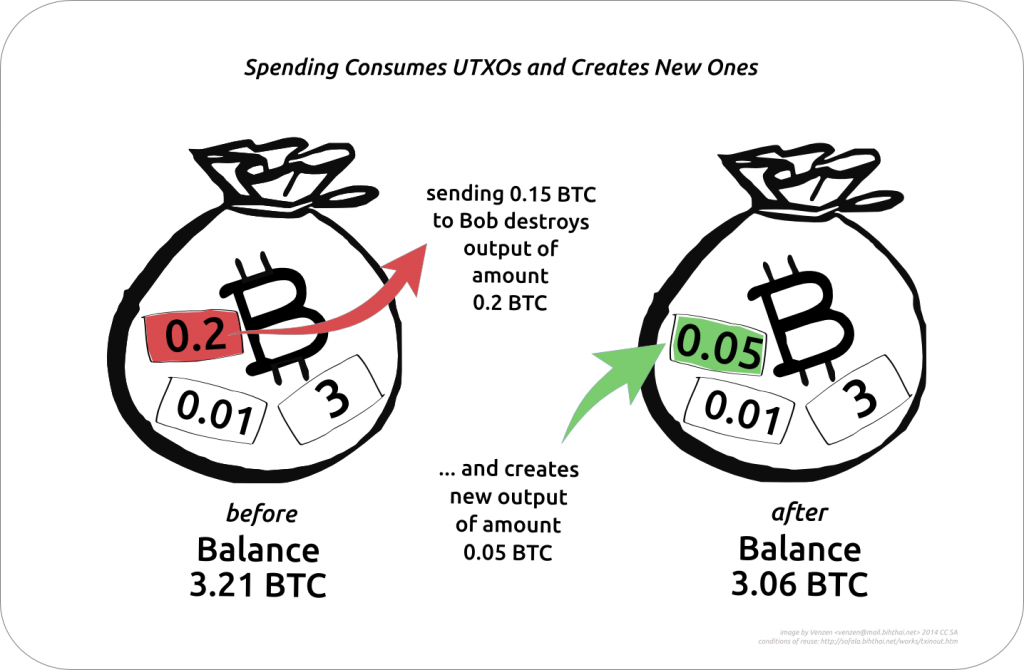

In [15]:
Image(filename='transaction.png', width="520")

Radi jednostavnosti implementacije nećemo koristiti javne i privatne ključeve. Račun je jednistveno određen svojim imenom(name).

In [16]:
import datetime as date

def getMeTime():
    
    return date.datetime.now()

Implementirati ćemo napredni blok u odnosu na prethodni, koji umjesto data sadrži listu transakcija, dodali smo index i timespamp. Timestamp je vrijeme kada je blok minean(izrudaren), a indexom određijemo koji je to blok po redu.
Dodatno novi blok sadrži i nounce, to je broj kojeg mineri pogađaju kako bi zadovoljili uvijet kako hash mora izgledati da bi blok bio uvršten u blockchain.
Dodana je metoda mineBlock koju koriste mineri kako bi našli hash bloka koji počinje sa određenim brojem nula. Razlog takvog uvjeta na hash je povećana težina mineanja bloka. Povećavanjem broja početnih nula potrebna je veća procesorska snaga za mineanje istog bloka. To je uvedeno da statistički vrijeme mineanja novog bloka bude u prosjeku fiksno neovisno o tome koliko se ukupna procesorska snaga mreže poveća.

In [17]:
import hashlib

class BlockAdvanced:

    def __init__(self, index, timpestamp, previousHash, transactions):
        
        self.index = index
        self.timestamp = timpestamp
        self.nounce = 0
        self.transactions = transactions
        self.previousHash = previousHash
        self.encoded = ""
        self.hash = ""
        self.dificulty = "0"*4+"F"*60
        
    def hashBlock(self):
        
        sha = hashlib.sha256()
        self.encoded = (str(self.index) + str(self.timestamp) + str(self.nounce)+
                str(self.transactions) + str(self.previousHash)).encode('utf-8')
        sha.update(self.encoded)
        return sha
    
    def mineBlock(self):
        
        while(not self.hashBlock().hexdigest()<self.dificulty):
            self.nounce +=1
        self.hash = self.hashBlock().hexdigest()        

### Rudari

Rudari(Mineri) su čvorovi koji imaju kod sebe cijeli blockchain (povijest transakcija), te iz mempoola uzimaju transakcije provjeravaju njuhovu validnost te ih uvrštavaju u novi blok ako su validne. Tako se natječu za nagradu koja se daje rudaru koji prvi izrudati novi blok.

In [18]:
class BlockchainAdvanced:
    
    def __init__(self, genesisBlock):
        
        self.blocks = []
        self.blocks.append(genesisBlock)
    
    def addNewBlock(self, block):
        
        self.blocks.append(block)
    
    def getSize(self):
        return len(self.blocks)

In [19]:
class Miner:
    
    def __init__(self, name, blockchain ,mempool, difficulty, maxTransactionsPerBlock):
        
        self.name = name
        self.blockchain = blockchain
        self.mempool = mempool
        self.difficulty = "0"*difficulty+"F"*(60-difficulty)
        self.maxTransactionsPerBlock = maxTransactionsPerBlock
        self.sizeOfMempool = self.mempool.getSizeOfMempool()
        self.blockchainSize = 1
        self.block = type('BlockAdvanced')
        self.cnt=1

    
    def mine(self):
        
        if(self.sizeOfMempool == 0):
            return 0
        transactions = []

        beg=True
        while(len(transactions) < self.maxTransactionsPerBlock  and (self.sizeOfMempool-1) >= 0):
            #if (beg):
            #    trans1 = Transaction("-",)
            if(self.transactionValid(  self.mempool.transactions[self.sizeOfMempool-1], transactions )):
                transactions.append(self.mempool.transactions[self.sizeOfMempool-1])
            self.mempool.transactions.remove(self.mempool.transactions[self.sizeOfMempool-1])
            self.sizeOfMempool = self.mempool.getSizeOfMempool()
                
            #self.sizeOfMempool -=1
            
        #self.mempool.printMempool()
        self.block = BlockAdvanced(self.blockchain.getSize(),getMeTime(),
                              self.blockchain.blocks[self.blockchain.getSize()-1].hash,
                                   transactions)
        self.blockchain.addNewBlock(self.block)
        self.blockchainSize +=1
        self.block.mineBlock()
        
        return self.block
    
    def transactionValid(self, trans,_transactions):
        
        sender = trans.sender
        amount = trans.amount
        balance = 0
        
        for block in self.blockchain.blocks:
            #printBlock(block)
            
            for tran in block.transactions:
                
                #print(tran.returnTransaction())
                if(tran.sender == sender):
                    balance -=tran.amount
                elif(tran.reciever == sender):
                    balance +=tran.amount
        
        for trans in _transactions:
            
            if(tran.sender == sender):
                balance -=tran.amount
                #print(sender+str(amount))
            elif(tran.reciever == sender):
                balance +=tran.amount
                #print(sender+str(amount))
            
                   
        if((balance-amount)>=0):
            return True
        
        else: return False
        
        
        

In [20]:
def printBlock(block):
    
    print("=" * 31 + " " + str(block.index) + " " + "=" * 30)
    print(str(block.hash))
    print("Prev. Hash:")
    print(str(block.previousHash))
    print(str(block.timestamp)+ "   Nounce: "+str(block.nounce))
    print("=" * 64)
    for trans in block.transactions:
        print(trans.returnTransaction())
    print("\n")
def printBlockchain(blockchain):
    
    for block in blockchain.blocks:
        printBlock(block)

In [21]:
genesisTrans =[]
for account in accounts:
    trans = Transaction("-",account,1000,0)
    #trans.returnTransaction()
    genesisTrans.append(trans)

## Simulacija

In [22]:
genesisTrans =[]
for account in accounts:
    trans = Transaction("-",account,100,0)
    #trans.returnTransaction()
    genesisTrans.append(trans)

genesisBlock = BlockAdvanced(0, getMeTime(),"",genesisTrans) 
genesisBlock.mineBlock() # izruderen prvi blok

simulationBlockchain = BlockchainAdvanced(genesisBlock)
simulationBlockchain = BlockchainAdvanced(genesisBlock)
accounts =['Alice','Bob','Mary','Peter','John']
simulationMempool = Mempool()
simulationMempool.generateRandom(100,accounts)
#simulationMempool.printMempool()

In [23]:
minerAlice = Miner("Alice",simulationBlockchain,simulationMempool,5,6)
new_block = minerAlice.mine()

while(minerAlice.mempool.getSizeOfMempool()!=0): 
    new_block = minerAlice.mine()

printBlockchain(simulationBlockchain)

=============================== 0 ==============================
000027adb3aa7994b994845fdd1e39162857d9d9f873458140d8238b03f6ecf6
Prev. Hash:

2018-04-15 23:44:08.837140   Nounce: 57353
- Alice 100 0
- Bob 100 0
- Mary 100 0
- Peter 100 0
- John 100 0


=============================== 1 ==============================
00007e17c2b37438e9d063d6297c4cc68b6e72bddc9cd2b5a6d0794b85e4b8c8
Prev. Hash:
000027adb3aa7994b994845fdd1e39162857d9d9f873458140d8238b03f6ecf6
2018-04-15 23:44:09.194466   Nounce: 111516
Bob Peter 36 0.99
Alice Peter 95 0.99
Peter Mary 83 0.97
Bob Mary 64 0.95
Peter Alice 75 0.94
Mary Peter 62 0.93


=============================== 2 ==============================
00004becb3e115acd816a3d4a60eeba1a0d73d8b071c3b70d1198cb76307b588
Prev. Hash:
00007e17c2b37438e9d063d6297c4cc68b6e72bddc9cd2b5a6d0794b85e4b8c8
2018-04-15 23:44:09.923547   Nounce: 121695
Peter Bob 91 0.92
Mary Bob 97 0.9
John Peter 88 0.9
John Bob 66 0.87
Peter John 51 0.87
Alice Mary 77 0.87


====================

Gornja implementacija primitivne kriptovalute je nepotpuna. Postoji samo jedan rudar, ako ih inicijaliziramo više oni neće moći surađivati, tj. svaki će graditi svoj blockchain. Također mempool je statičan i transakcije može generirati bilo tko, što je inače okraničeno samo na korisnika koji ima privatni ključ računa.

In [24]:
from multiprocessing import Process
   
dificulty = "0"*5+"F"*60
timestamp1 = getMeTime()

prevHash=genesisBlock.hash
index=1
parallelMempool = Mempool()
parallelMempool.generateRandom(5,accounts)
transactions = parallelMempool.transactions
timestamp2 = getMeTime()
nounce1=0
nounce2=0

def hashBlock(index,timestamp,previousHash,transactions,nounce):
        
    sha = hashlib.sha256()
    encoded = (str(index) + str(timestamp) + str(nounce)+
            str(transactions) + 
               str(previousHash)).encode('utf-8')
    sha.update(encoded)
    return sha

def mineBlock1(index,timestamp,previousHash,transactions):
   
    nounce1=0
    while(not hashBlock(index,timestamp,previousHash,transactions,nounce1).hexdigest()<dificulty):
        nounce1 +=1
        pass
    hashh = hashBlock(index,timestamp,previousHash,transactions,nounce1).hexdigest()
    print ("Block1 mined! hash:"+hashh)
    
def mineBlock2(index,timestamp,previousHash,transactions):

    nounce2=0
    while(not hashBlock(index,timestamp,previousHash,transactions,nounce2).hexdigest()<dificulty):
        nounce2 +=1
        pass
    hashh = hashBlock(index,timestamp,previousHash,transactions,nounce2).hexdigest()
    print ("Block2 mined! hash:"+hashh)
    
p1=Process(target=mineBlock2(index,timestamp1,prevHash,transactions))
p1.start()
p2 = Process(target=mineBlock1(index,timestamp2,prevHash,transactions))
p2.start()
p1.join()
p2.join()

Block2 mined! hash:000005e1d7094fcd07b93efe1c5a6107910b4a33a9afeea67c6907d14c463892
Block1 mined! hash:0000098fa9623cd7293ad091842dc8ed5f6a61e711524ed350ab35414b124dab


In [25]:
import numpy as np
import pandas as pd
bitcoin = pd.read_csv('data/bitcoin_price.csv')


In [26]:
from datetime import date, timedelta

def getDates(lista, d1,d2):
    
    delta = d2 - d1         
    for i in range(delta.days + 1):
        lista.append(d2 - timedelta(days=i))
btcLis=[]

getDates(btcLis,date(2013, 4, 28),date(2018, 2, 20))

## Graf cijene Bitcoina

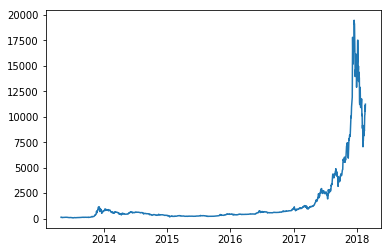

In [27]:
%matplotlib inline 
import matplotlib.pyplot as plt
plt.plot(btcLis,bitcoin.Open.values)

In [28]:
pozitivniDani = bitcoin.Open.values-bitcoin.Close.values

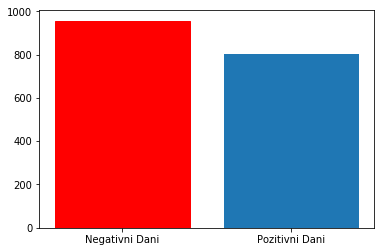

In [29]:
from matplotlib.ticker import FuncFormatter

x = np.arange(2)
brojDana = [(pozitivniDani>=0).sum(), (pozitivniDani<0).sum()]
barlist=plt.bar(['Pozitivni Dani', 'Negativni Dani'], brojDana)
barlist[1].set_color('r')
plt.show()

In [30]:
import calendar

stat=[]
dayOfWeek =[]
for it,item in enumerate(btcLis):

    poz=0
    if(pozitivniDani[it]>0): poz=1
    stat.append((calendar.day_name[item.weekday()],poz))
#stat

In [31]:
s = pd.Series(dayOfWeek)
s
dayInWeek=[
 'Sunday',
 'Saturday',
 'Friday',
 'Thursday',
 'Wednesday',
 'Tuesday',
 'Monday',]
cnt= np.zeros(7)
positive=dict(zip(dayInWeek,cnt))
negative=dict(zip(dayInWeek,cnt))
        
for s in stat:
    if(s[1]>0):
        positive[s[0]] +=1
    else:
        negative[s[0]] +=1
        
negativList=[]
positLis = []
for i in dayInWeek:
    negativList.append(positive[i])
    positLis.append(negative[i])
pos = pd.DataFrame(negativList,columns=['Positive days'],index=dayInWeek)
sor=pos.sort_values(by='Positive days')
sor

Positive days
Monday             107.0
Friday             108.0
Saturday           109.0
Tuesday            112.0
Thursday           115.0
Wednesday          124.0
Sunday             126.0

In [32]:
neg = pd.DataFrame(positLis,columns=['Negative days'],index=dayInWeek)
neg
sorNeg=neg.sort_values(by='Negative days')
sorNeg

Negative days
Sunday             126.0
Wednesday          127.0
Thursday           136.0
Tuesday            140.0
Saturday           142.0
Friday             143.0
Monday             145.0

Najveće cijene bitcoina su ponedjeljkom dok su nedjeljom najmanje.

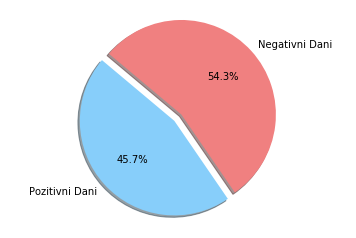

In [33]:
# Data to plot
labels = 'Pozitivni Dani', 'Negativni Dani'
sizes = [(pozitivniDani>=0).sum(), (pozitivniDani<0).sum()]
colors = ['lightskyblue',  'lightcoral']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

Graf volatilnosti - razlika izmeđuu otvarajuće i zatvarajuće cijene Bitcoina

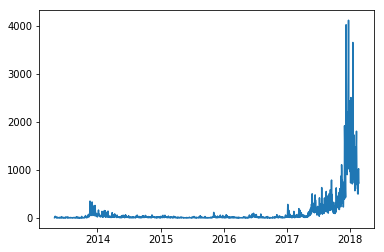

In [34]:
#%matplotlib inline 
volatilnost = bitcoin.High.values-bitcoin.Low.values
plt.plot(btcLis,volatilnost)

In [35]:
ethereum = pd.read_csv('data/ethereum_price.csv')
ethLis=[]
         
getDates(ethLis,date(2015, 8, 7),date(2018, 2, 20))

ripple = pd.read_csv('data/ripple_price.csv')
ripLis=[]
         
getDates(ripLis,date(2013, 8, 4),date(2018, 2, 20))

Text(0.5,1,'Ripple')

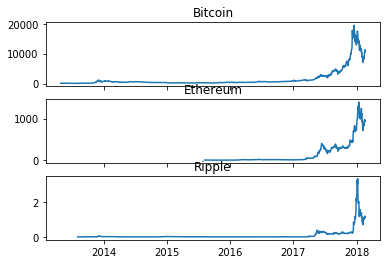

In [36]:
fig3, (lijevi, srednji, desni) = plt.subplots(3, 1 , sharex=True)
x2 = np.linspace(0, 2)
lijevi.plot(btcLis,bitcoin.Open.values)
lijevi.set_title('Bitcoin')
srednji.plot(ethLis,ethereum.Open.values)
srednji.set_title('Ethereum')
desni.plot(ripLis,ripple.Open.values)
desni.set_title('Ripple')

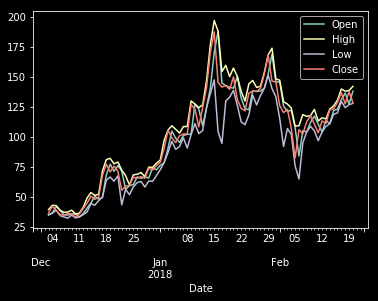

In [37]:
fixed_df = pd.read_csv('data/neo_price.csv', sep=',', encoding='latin1', parse_dates=['Date'], dayfirst=True, index_col='Date')

with plt.style.context(('dark_background')):
    fixed_df[:80].plot()
plt.show()

In [38]:
import re
match = re.search(r'(\d-\d-\d)', bitcoin.Date.values[0])
re.split(r'-',bitcoin.Date.values[0])

['Feb 20, 2018']